In [1]:
import pandas as pd

In [2]:
import requests

#### Use APOD

In [4]:

base_url="https://api.nasa.gov/planetary/apod?api_key=TLBqprFwvPmLypDj9C32tRYZ3gjO1kdC0SoWChZO"
response=requests.get(base_url)
response.ok



True

In [5]:
response.json()

{'copyright': '\nBrian Hopkins \n(East Coast Astronomer)\n',
 'date': '2025-03-17',
 'explanation': "Thor not only has his own day (Thursday), but a helmet in the heavens.  Popularly called Thor's Helmet, NGC 2359 is a hat-shaped cosmic cloud with wing-like appendages. Heroically sized even for a Norse god, Thor's Helmet is about 30 light-years across. In fact, the cosmic head-covering is more like an interstellar bubble, blown by a fast wind from the bright, massive star near the bubble's center. Known as a Wolf-Rayet star, the central star is an extremely hot giant thought to be in a brief, pre-supernova stage of evolution. NGC 2359 is located about 15,000 light-years away toward the constellation of the Great Overdog. This sharp image is a mixed cocktail of data from  narrowband filters, capturing not only natural looking stars but details of the nebula's filamentary structures. The star in the center of Thor's Helmet is expected to explode in a spectacular supernova sometime within

#### Sample API call for NeoWs

In [7]:
base_url='https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=TLBqprFwvPmLypDj9C32tRYZ3gjO1kdC0SoWChZO'
response=requests.get(base_url)
response.ok

True

In [8]:
response.json()

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-08&end_date=2015-09-09&detailed=false&api_key=TLBqprFwvPmLypDj9C32tRYZ3gjO1kdC0SoWChZO',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-06&end_date=2015-09-07&detailed=false&api_key=TLBqprFwvPmLypDj9C32tRYZ3gjO1kdC0SoWChZO',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&detailed=false&api_key=TLBqprFwvPmLypDj9C32tRYZ3gjO1kdC0SoWChZO'},
 'element_count': 27,
 'near_earth_objects': {'2015-09-08': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2465633?api_key=TLBqprFwvPmLypDj9C32tRYZ3gjO1kdC0SoWChZO'},
    'id': '2465633',
    'neo_reference_id': '2465633',
    'name': '465633 (2009 JR5)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2465633',
    'absolute_magnitude_h': 20.44,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2170475943,
      'estimated_diameter_max': 0.4853331752},
  

### load the data using pandas and handle nested json

In [10]:
data=response.json()
records = []
element_count = data['element_count']

# Iterate over all dates in the near_earth_objects
for date, objects in data['near_earth_objects'].items():
    for obj in objects:
        
        flat_record = {
            
            'next_link': data['links']['next'],
            'previous_link': data['links']['previous'],
            'self_link': data['links']['self'],
            'element_count': element_count,
            'date': date,
            'id': obj['id'],
            'neo_reference_id': obj['neo_reference_id'],
            'name': obj['name'],
            'nasa_jpl_url': obj['nasa_jpl_url'],
            'absolute_magnitude_h': obj['absolute_magnitude_h'],
            'estimated_diameter_min_km': obj['estimated_diameter']['kilometers']['estimated_diameter_min'],
            'estimated_diameter_max_km': obj['estimated_diameter']['kilometers']['estimated_diameter_max'],
            'estimated_diameter_min_m': obj['estimated_diameter']['meters']['estimated_diameter_min'],
            'estimated_diameter_max_m': obj['estimated_diameter']['meters']['estimated_diameter_max'],
            'estimated_diameter_min_mi': obj['estimated_diameter']['miles']['estimated_diameter_min'],
            'estimated_diameter_max_mi': obj['estimated_diameter']['miles']['estimated_diameter_max'],
            'estimated_diameter_min_ft': obj['estimated_diameter']['feet']['estimated_diameter_min'],
            'estimated_diameter_max_ft': obj['estimated_diameter']['feet']['estimated_diameter_max'],
            'is_potentially_hazardous_asteroid': obj['is_potentially_hazardous_asteroid'],
            'close_approach_date': obj['close_approach_data'][0]['close_approach_date'],
            'close_approach_date_full': obj['close_approach_data'][0]['close_approach_date_full'],
            'epoch_date_close_approach': obj['close_approach_data'][0]['epoch_date_close_approach'],
            'relative_velocity_km_s': obj['close_approach_data'][0]['relative_velocity']['kilometers_per_second'],
            'relative_velocity_km_h': obj['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'],
            'relative_velocity_mi_h': obj['close_approach_data'][0]['relative_velocity']['miles_per_hour'],
            'miss_distance_astronomical': obj['close_approach_data'][0]['miss_distance']['astronomical'],
            'miss_distance_lunar': obj['close_approach_data'][0]['miss_distance']['lunar'],
            'miss_distance_km': obj['close_approach_data'][0]['miss_distance']['kilometers'],
            'miss_distance_mi': obj['close_approach_data'][0]['miss_distance']['miles'],
            'orbiting_body': obj['close_approach_data'][0]['orbiting_body'],
            'is_sentry_object': obj['is_sentry_object'],
        }
        records.append(flat_record)


normalized_data = pd.DataFrame(records)


normalized_data


,next_link,previous_link,self_link,element_count,date,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,...,epoch_date_close_approach,relative_velocity_km_s,relative_velocity_km_h,relative_velocity_mi_h,miss_distance_astronomical,miss_distance_lunar,miss_distance_km,miss_distance_mi,orbiting_body,is_sentry_object
0,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,2465633,2465633,465633 (2009 JR5),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.44,...,1441744080000,18.1279360862,65260.5699103704,40550.3802312521,0.3027469457,117.7685618773,45290298.225725659,28142086.3515817342,Earth,False
1,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3426410,3426410,(2008 QV11),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,21.34,...,1441722660000,19.7498128142,71099.3261312856,44178.3562841869,0.2591250701,100.7996522689,38764558.550560687,24087179.7459520006,Earth,False
2,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3553060,3553060,(2010 XT10),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,26.50,...,1441714020000,19.1530348886,68950.9255988812,42843.4237422604,0.4917435147,191.2882272183,73563782.385433689,45710414.7542113482,Earth,False
3,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3726710,3726710,(2015 RC),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,24.30,...,1441705500000,19.486643553,70151.9167909206,43589.6729637806,0.0269252677,10.4739291353,4027962.697099799,2502859.9608192662,Earth,False
4,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3727181,3727181,(2015 RO36),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,22.93,...,1441722960000,15.8091452192,56912.9227892906,35363.4769409345,0.0540517856,21.0261445984,8086031.995456672,5024427.2961871936,Earth,False
5,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3727639,3727639,(2015 RN83),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,21.77,...,1441726920000,12.0811420305,43492.1113096542,27024.3066079349,0.1684193589,65.5151306121,25195177.358205543,15655557.2525527734,Earth,False
6,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3730577,3730577,(2015 TX237),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.30,...,1441721940000,6.573400491,23664.2417675863,14704.0395583094,0.0795238758,30.9347876862,11896602.433824546,7392205.9712328948,Earth,False
7,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3731587,3731587,(2015 UG),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,22.81,...,1441738200000,11.9557600601,43040.7362163935,26743.8396784585,0.1132399881,44.0503553709,16940461.018585347,10526314.3652659086,Earth,False
8,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,3747356,3747356,(2016 EK158),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.49,...,1441707960000,16.9572895141,61046.242250638,37931.7609140145,0.2804752346,109.1048662594,41958497.683910302,26071801.4952820876,Earth,False
9,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/

### save data as csv

In [12]:
normalized_data.to_csv(' Asteroids closest approach date to Earth.csv')

### handling missing values

In [14]:
print(normalized_data.isnull().sum())

next_link                            0
previous_link                        0
self_link                            0
element_count                        0
date                                 0
id                                   0
neo_reference_id                     0
name                                 0
nasa_jpl_url                         0
absolute_magnitude_h                 0
estimated_diameter_min_km            0
estimated_diameter_max_km            0
estimated_diameter_min_m             0
estimated_diameter_max_m             0
estimated_diameter_min_mi            0
estimated_diameter_max_mi            0
estimated_diameter_min_ft            0
estimated_diameter_max_ft            0
is_potentially_hazardous_asteroid    0
close_approach_date                  0
close_approach_date_full             0
epoch_date_close_approach            0
relative_velocity_km_s               0
relative_velocity_km_h               0
relative_velocity_mi_h               0
miss_distance_astronomica

### Type conversion date column to datetime

In [16]:
normalized_data['date'] = pd.to_datetime(normalized_data['date'])
normalized_data['close_approach_date'] = pd.to_datetime(normalized_data['close_approach_date'])
normalized_data['close_approach_date_full'] = pd.to_datetime(normalized_data['close_approach_date_full'])

print(normalized_data.dtypes)

next_link                                    object
previous_link                                object
self_link                                    object
element_count                                 int64
date                                 datetime64[ns]
id                                           object
neo_reference_id                             object
name                                         object
nasa_jpl_url                                 object
absolute_magnitude_h                        float64
estimated_diameter_min_km                   float64
estimated_diameter_max_km                   float64
estimated_diameter_min_m                    float64
estimated_diameter_max_m                    float64
estimated_diameter_min_mi                   float64
estimated_diameter_max_mi                   float64
estimated_diameter_min_ft                   float64
estimated_diameter_max_ft                   float64
is_potentially_hazardous_asteroid              bool
close_approa

#### Mean Diameter of Asteroids and Standardize the Units of Velocity and Size

In [18]:


# convert relevant columns to numeric
normalized_data['estimated_diameter_min_km'] = pd.to_numeric(normalized_data['estimated_diameter_min_km'], errors='coerce')
normalized_data['estimated_diameter_max_km'] = pd.to_numeric(normalized_data['estimated_diameter_max_km'], errors='coerce')
normalized_data['relative_velocity_km_h'] = pd.to_numeric(normalized_data['relative_velocity_km_h'], errors='coerce')
normalized_data['relative_velocity_mi_h'] = pd.to_numeric(normalized_data['relative_velocity_mi_h'], errors='coerce')

# Calculate mean diameter in kilometers
normalized_data['mean_diameter_km'] = (
    normalized_data['estimated_diameter_min_km'] + normalized_data['estimated_diameter_max_km']
) / 2

# Standardizing velocities (convert km/h to m/s)
normalized_data['relative_velocity_m_s'] = (
    normalized_data['relative_velocity_km_h'] / 3.6  # km/h to m/s
)

# Convert mph to m/s
normalized_data['relative_velocity_mph_m_s'] = (
    normalized_data['relative_velocity_mi_h'] * 0.44704  # mph to m/s
)

# mean diameter of all asteroids
mean_diameter = normalized_data['mean_diameter_km'].mean()


# results
print(f"Mean Diameter (km): {mean_diameter}")


Mean Diameter (km): 0.1239569137537037


#### How many Neos are marked as Hazardous

In [20]:
# number of potentially hazardous asteroids (marked as True)
hazardous_count = normalized_data['is_potentially_hazardous_asteroid'].sum()

# Total number of NEOs 
total_count = normalized_data.shape[0]

# Percentage of hazardous asteroids
hazardous_percentage = (hazardous_count / total_count) * 100 if total_count > 0 else 0

# Results
print(f"Number of potentially hazardous asteroids: {hazardous_count}")
print(f"Total number of NEOs in the dataset: {total_count}")
print(f"Percentage of hazardous asteroids: {hazardous_percentage:.2f}%")


Number of potentially hazardous asteroids: 1
Total number of NEOs in the dataset: 27
Percentage of hazardous asteroids: 3.70%


In [21]:
# Filter the DataFrame to get potentially hazardous asteroids
hazardous_asteroids = normalized_data[normalized_data['is_potentially_hazardous_asteroid']]

hazardous_asteroids


,next_link,previous_link,self_link,element_count,date,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,...,relative_velocity_mi_h,miss_distance_astronomical,miss_distance_lunar,miss_distance_km,miss_distance_mi,orbiting_body,is_sentry_object,mean_diameter_km,relative_velocity_m_s,relative_velocity_mph_m_s
0,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,http://api.nasa.gov/neo/rest/v1/feed?start_dat...,27,2015-09-08,2465633,2465633,465633 (2009 JR5),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.44,...,40550.380231,0.3027469457,117.7685618773,45290298.225725659,28142086.3515817342,Earth,False,0.35119,18127.936086,18127.641979


#### Compare the Average velocity of Hazardous vs Non_Hazardous Asteroids

In [23]:
# average velocity for hazardous asteroids
average_hazardous_velocity = normalized_data[normalized_data['is_potentially_hazardous_asteroid']]['relative_velocity_m_s'].mean()

# average velocity for non-hazardous asteroids
average_non_hazardous_velocity = normalized_data[~normalized_data['is_potentially_hazardous_asteroid']]['relative_velocity_m_s'].mean()

# results
print(f"Average velocity of hazardous asteroids (m/s): {average_hazardous_velocity}")
print(f"Average velocity of non-hazardous asteroids (m/s): {average_non_hazardous_velocity}")


Average velocity of hazardous asteroids (m/s): 18127.936086214002
Average velocity of non-hazardous asteroids (m/s): 13494.206675051078


#### Plot line graph of Hazardous Neos overtime

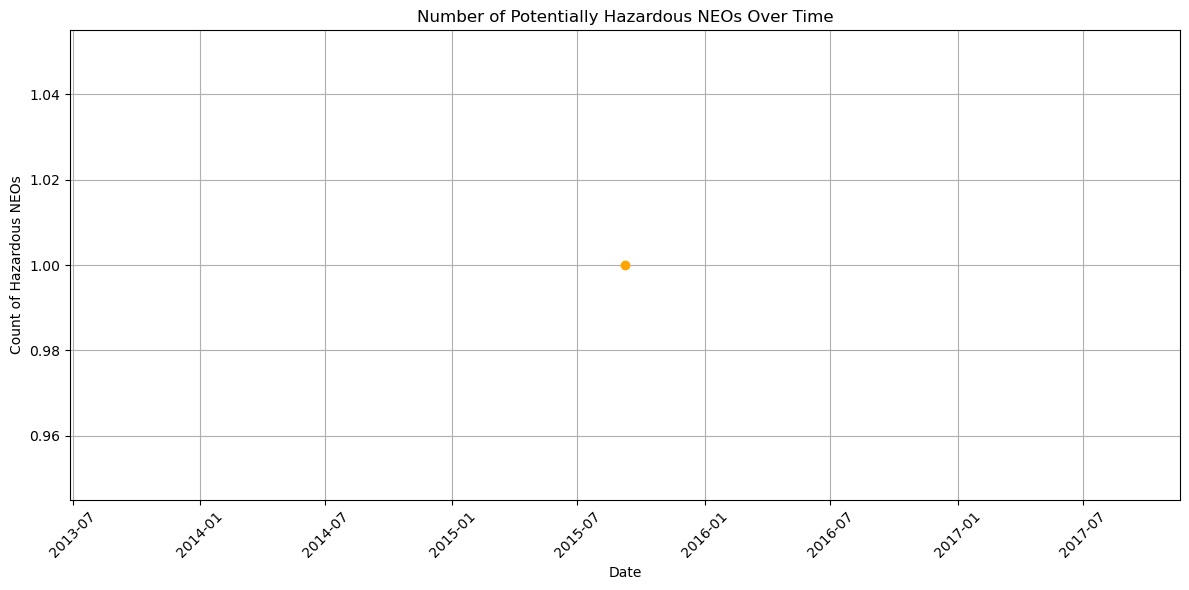

In [25]:

import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
normalized_data['date'] = pd.to_datetime(normalized_data['date'])

# Group by date and count hazardous NEOs
hazardous_counts = normalized_data[normalized_data['is_potentially_hazardous_asteroid']].groupby('date').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hazardous_counts.index, hazardous_counts.values, marker='o', linestyle='-', color='orange')
plt.title('Number of Potentially Hazardous NEOs Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Hazardous NEOs')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


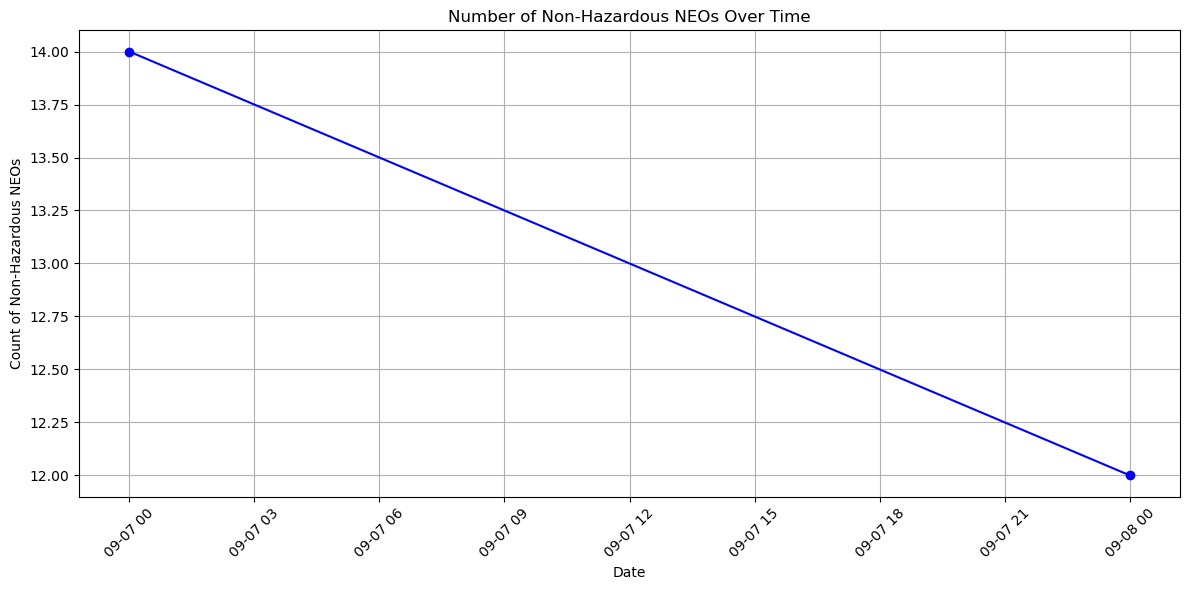

In [26]:


# Ensure the date column is in datetime format
normalized_data['date'] = pd.to_datetime(normalized_data['date'])

# Group by date and count non-hazardous NEOs
non_hazardous_counts = normalized_data[~normalized_data['is_potentially_hazardous_asteroid']].groupby('date').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(non_hazardous_counts.index, non_hazardous_counts.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Non-Hazardous NEOs Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Non-Hazardous NEOs')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


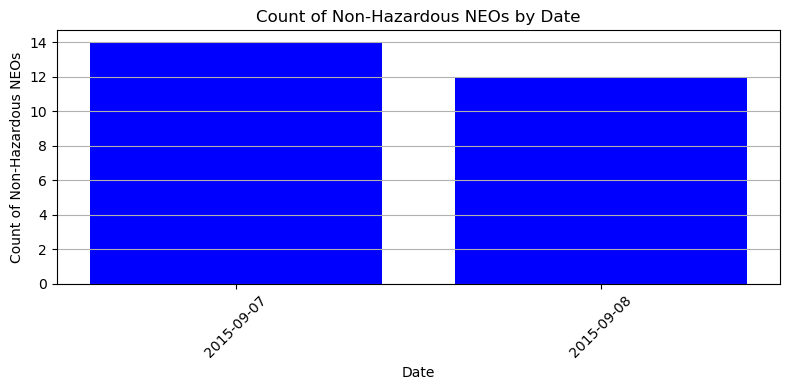

In [27]:

# Ensure the date column is in datetime format
normalized_data['date'] = pd.to_datetime(normalized_data['date'])

# Group by date and count non-hazardous NEOs
non_hazardous_counts = normalized_data[~normalized_data['is_potentially_hazardous_asteroid']].groupby('date').size()

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(non_hazardous_counts.index.astype(str), non_hazardous_counts.values, color='blue')
plt.title('Count of Non-Hazardous NEOs by Date')
plt.xlabel('Date')
plt.ylabel('Count of Non-Hazardous NEOs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Descriptive Statistics

In [29]:

# Check for non-numeric values in the relevant columns
for col in ['estimated_diameter_min_km', 
            'estimated_diameter_max_km', 
            'relative_velocity_m_s', 
            'miss_distance_km']:
    print(f"Unique values in {col}:")
    print(normalized_data[col].unique())

# Convert relevant columns to numeric, forcing errors to NaN
normalized_data['estimated_diameter_min_km'] = pd.to_numeric(normalized_data['estimated_diameter_min_km'], errors='coerce')
normalized_data['estimated_diameter_max_km'] = pd.to_numeric(normalized_data['estimated_diameter_max_km'], errors='coerce')
normalized_data['relative_velocity_m_s'] = pd.to_numeric(normalized_data['relative_velocity_m_s'], errors='coerce')
normalized_data['miss_distance_km'] = pd.to_numeric(normalized_data['miss_distance_km'], errors='coerce')


# Descriptive statistics for relevant columns
descriptive_stats = normalized_data[['estimated_diameter_min_km', 
                                      'estimated_diameter_max_km', 
                                      'relative_velocity_m_s', 
                                      'miss_distance_km']].describe()

print("Descriptive Statistics:")
print(descriptive_stats)

# Additional statistics for specific insights
mean_diameter_min = normalized_data['estimated_diameter_min_km'].mean()
mean_diameter_max = normalized_data['estimated_diameter_max_km'].mean()
mean_velocity = normalized_data['relative_velocity_m_s'].mean()
mean_miss_distance = normalized_data['miss_distance_km'].mean()

print("\nAdditional Summary Statistics:")
print(f"Mean Minimum Diameter (km): {mean_diameter_min:.2f}")
print(f"Mean Maximum Diameter (km): {mean_diameter_max:.2f}")
print(f"Mean Velocity (m/s): {mean_velocity:.2f}")
print(f"Mean Miss Distance (km): {mean_miss_distance:.2f}")


Unique values in estimated_diameter_min_km:
[0.21704759 0.14340192 0.01332156 0.03669061 0.06895329 0.11763999
 0.0581507  0.07287104 0.21210699 0.03503926 0.07665756 0.01029331
 0.00294141 0.31809363 0.09875406 0.0121494  0.0146068  0.05064715
 0.06991252 0.03841979 0.00840533 0.00166171 0.09650615 0.19255508
 0.03346224 0.01108039 0.05708933]
Unique values in estimated_diameter_max_km:
[0.48533318 0.32065645 0.02978791 0.08204271 0.15418424 0.26305101
 0.13002893 0.1629446  0.47428564 0.07835018 0.17141151 0.02301654
 0.00657718 0.71127899 0.2208208  0.02716689 0.03266179 0.11325046
 0.15632915 0.08590926 0.0187949  0.00371569 0.2157943  0.43056624
 0.07482384 0.0247765  0.12765563]
Unique values in relative_velocity_m_s:
[18127.93608621 19749.81281425 19153.03488858 19486.64355303
 15809.14521925 12081.14203046  6573.400491   11955.76006011
 16957.28951407 19098.39456974  9310.67954727  5202.62089526
 11847.08843356  1163.08430523  8763.5328327   8087.16589269
  3516.96161741  7271.